In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
sns.set(style='darkgrid', font_scale=1.1)

In [16]:
try:
 df = pd.read_csv("gender.csv")
 print("Berhasil membaca data")
except Exception as e:
 print(f"Gagal Membaca data as {e}")

Berhasil membaca data


In [17]:
df.shape

(5001, 8)

In [18]:
df.duplicated().sum()

np.int64(1768)

In [19]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [20]:
df.drop_duplicates(inplace=True)

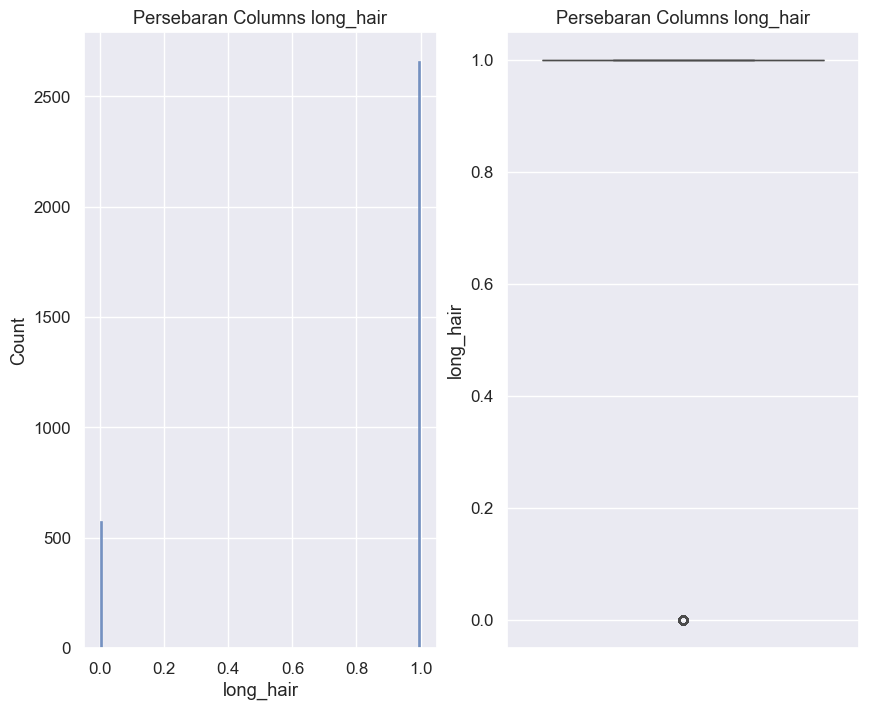

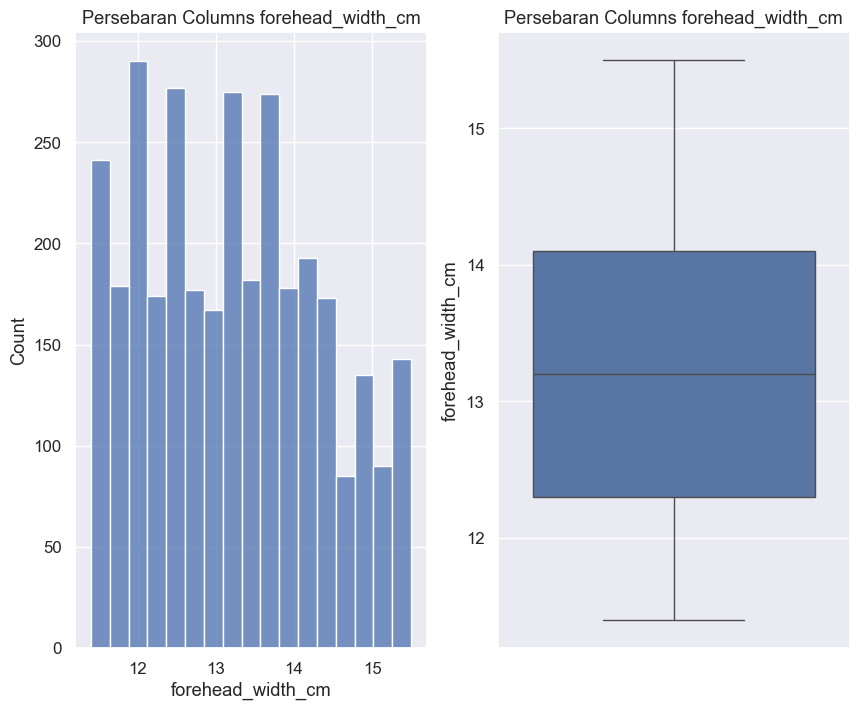

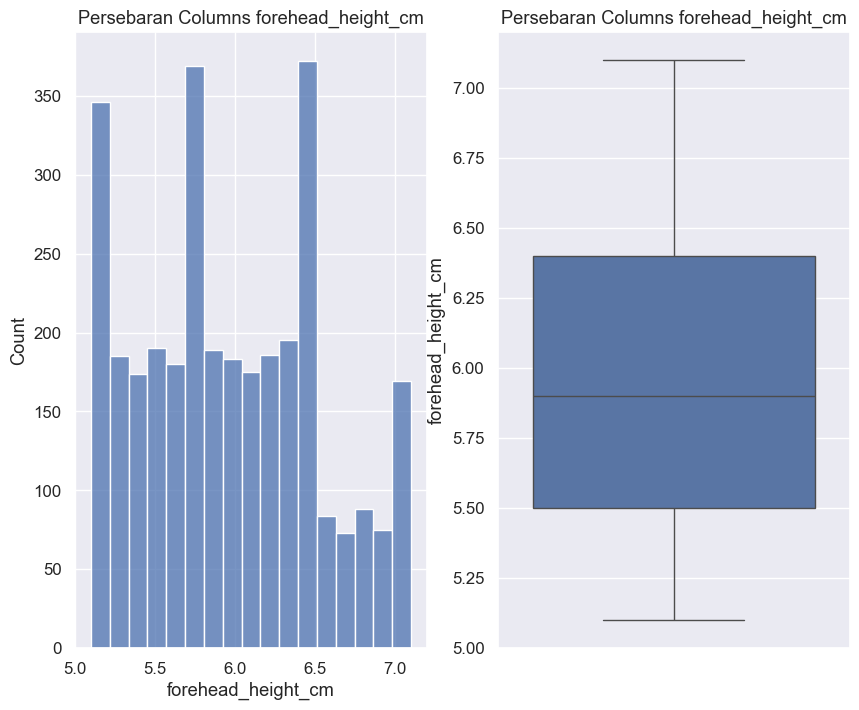

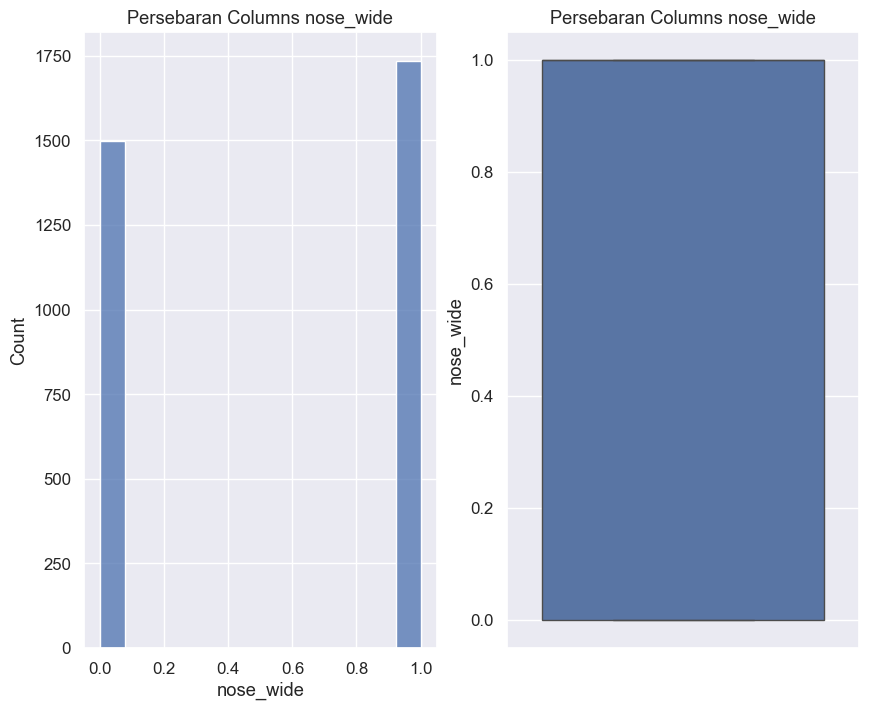

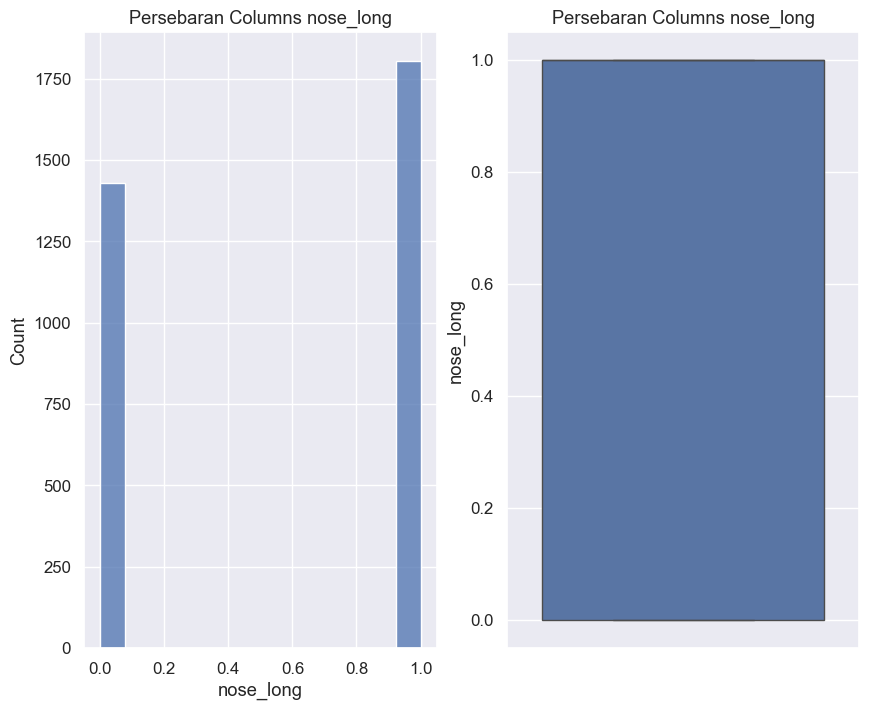

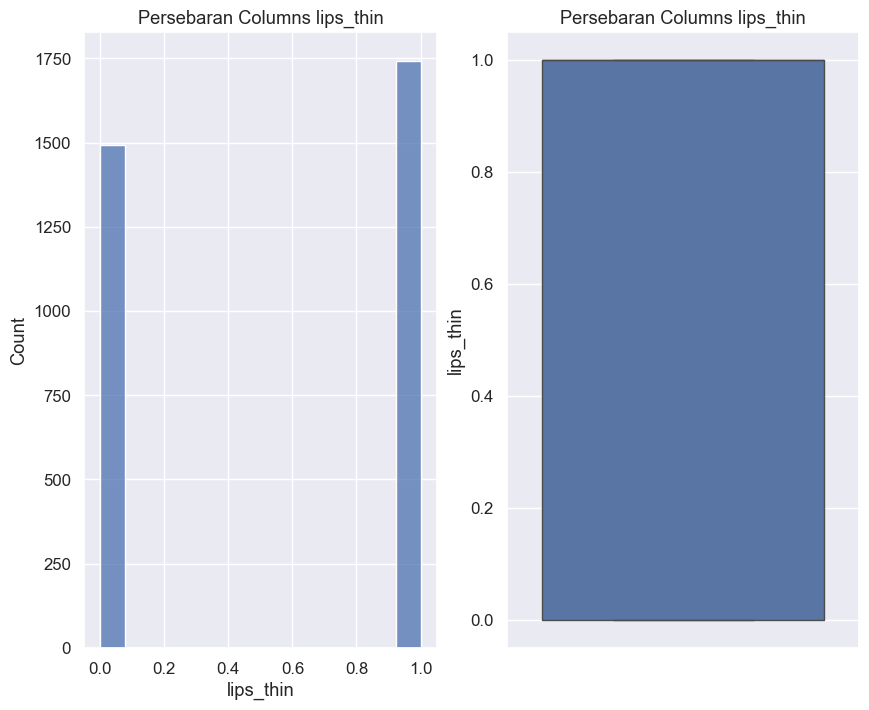

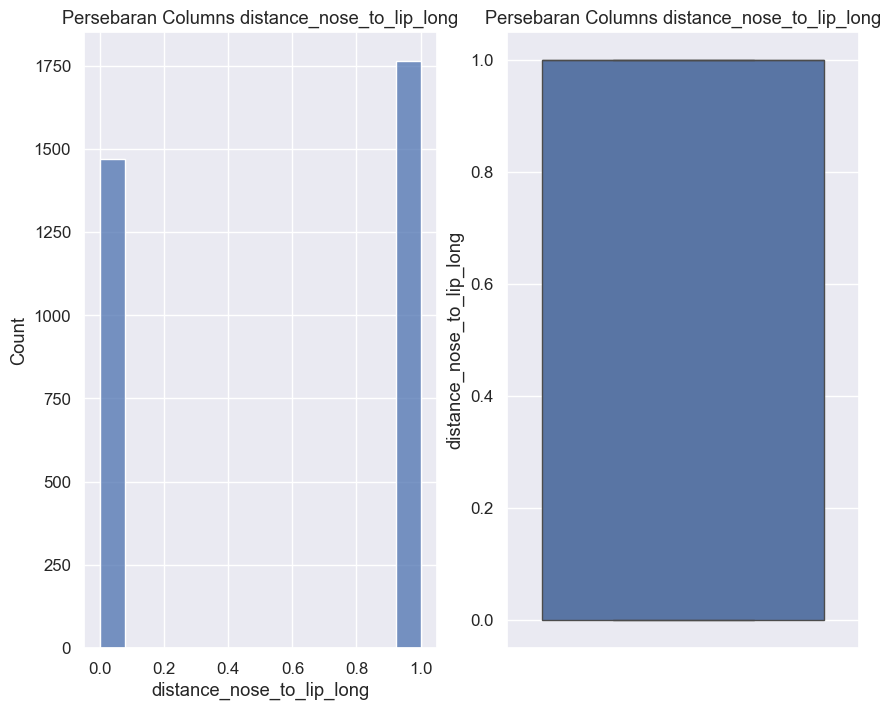

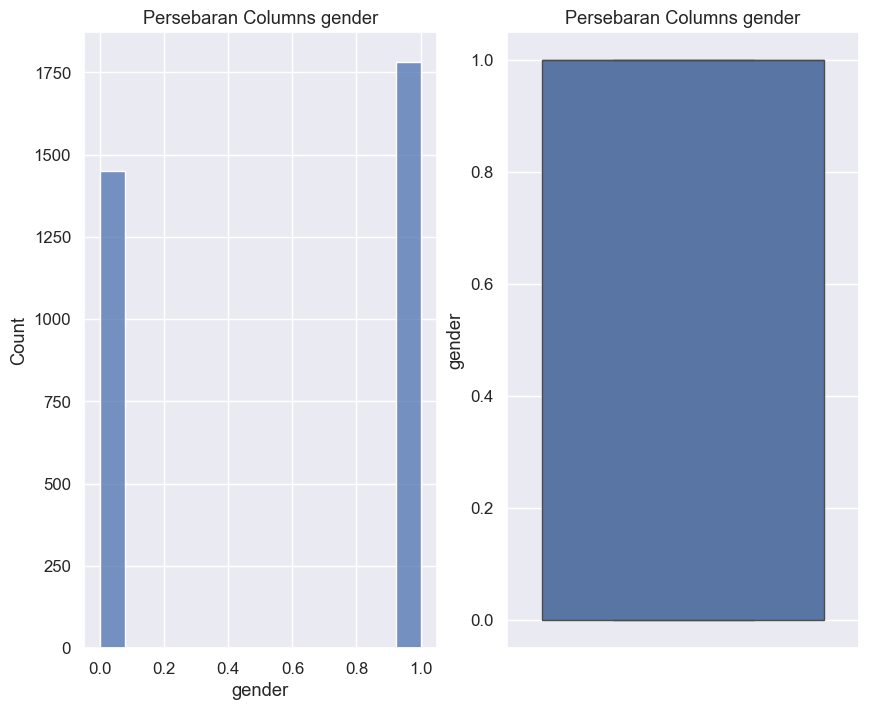

In [60]:
for col in df.select_dtypes(include='number'):
 fig, axes = plt.subplots(1,2, figsize=(10, 8))
 sns.histplot(df[col], ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")

In [21]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,13.217198,5.966038,0.536344,0.557686,0.538509,0.545314
std,0.382188,1.115993,0.549789,0.498755,0.496738,0.498592,0.498019
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.200000,5.900000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [22]:
gender_mapping = {'Male' : 1, 'Female' : 0}
df['gender'] = df['gender'].map(gender_mapping)

In [23]:
features = df.drop(columns='gender')
target = df['gender']

features = (features - features.min()) / (features.max() - features.min())
features.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1.0,0.097561,0.50,1.0,0.0,1.0,1.0
1,0.0,0.634146,0.15,0.0,0.0,1.0,0.0
2,0.0,0.097561,0.60,1.0,1.0,1.0,1.0
3,0.0,0.731707,0.50,0.0,1.0,1.0,1.0
4,1.0,0.512195,0.40,0.0,0.0,0.0,0.0


In [24]:
df.shape

(3233, 8)

In [25]:
X_data = features
y_data = target

In [26]:
# fungsi untuk bagi data
def stratified_split_data(X, y, train_size=0.8, random_state=42):
    np.random.seed(random_state)
    
    X_train_list, X_test_list = [], []   
    y_train_list, y_test_list = [], [] 
    
    for class_value in np.unique(y):
        class_idx = np.where(y == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X.iloc[idx[:split_ratio]])
        X_test_list.append(X.iloc[idx[split_ratio:]])
        y_train_list.append(y.iloc[idx[:split_ratio]])
        y_test_list.append(y.iloc[idx[split_ratio:]])

    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split_data(X_data, y_data)

In [ ]:
class KNN:
    def __init__(self, k, p):
        self.K = k
        self.p = p
        
    def jarak(self, x1, x2):
        if self.p == 1:
            return np.sum(np.abs(x1 - x2))
        else:
            return np.sqrt(np.sum((x1 - x2) ** 2))
        
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x, X):
        jaraks = [self.jarak(x, x_train) for x_train in self.X_train]
        best_k = np.argsort(jaraks)[:self.K]
        label_k = [self.y_train[i] for i in best_k]
        hasil = max(set(label_k), key=label_k.count)
        return hasil

In [47]:
model = KNN(3)
model.train(X_train.values, y_train.values)
y_pred_test = model.predict(X_test.values)
y_pred_train = model.predict(X_train.values)

In [59]:
accuracy_test = np.mean(y_pred_test == y_test.values)
accuracy_test

np.float64(0.9459041731066461)

In [ ]:
accuracy_train = np.mean(y_pred_train == y_train.values)
accuracy_train

np.float64(0.9663573085846868)

In [64]:
label = df['gender'].unique()

In [69]:
y_pred_array = np.array(y_pred_test)
y_test_array = np.array(y_test.values)

TP = np.sum((y_pred_array == 1) & (y_test_array == 1))
FP = np.sum((y_pred_array == 1) & (y_test_array == 0))
TN = np.sum((y_pred_array == 0) & (y_test_array == 0))
FN = np.sum((y_pred_array == 0) & (y_test_array == 1))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"True Negatives: {TN}")
print(f"False Negatives: {FN}")

True Positives: 342
False Positives: 20
True Negatives: 270
False Negatives: 15


In [70]:
precision = TP / (TP + FP)
precision

np.float64(0.9447513812154696)

In [71]:
recall = TP / (TP + FN)
recall

np.float64(0.957983193277311)

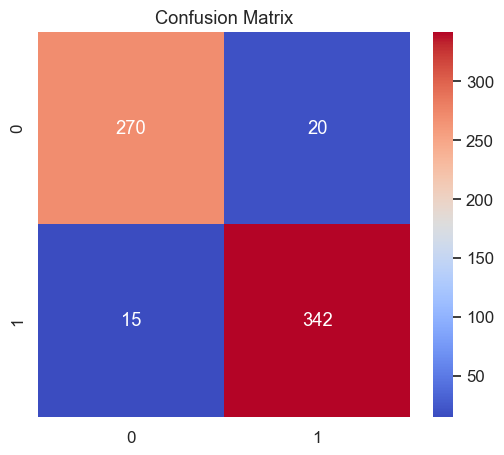

In [57]:
cm = np.array([
    [TN, FP],
    [FN, TP]
])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix")
plt.show()

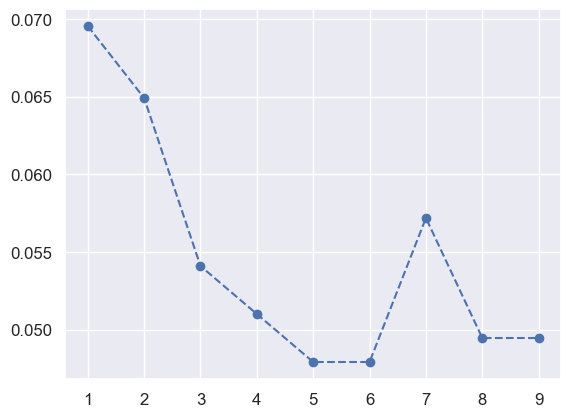

In [58]:
errors = []
range_k = range(1, 10)

for k in range_k:
    model = KNN(k = k)
    model.train(X_train.values, y_train.values)
    pred = model.predict(X_test.values)
    error = np.mean(pred != y_test.values)
    errors.append(error)
    
plt.plot(range_k, errors, marker='o', linestyle='--')
plt.show()

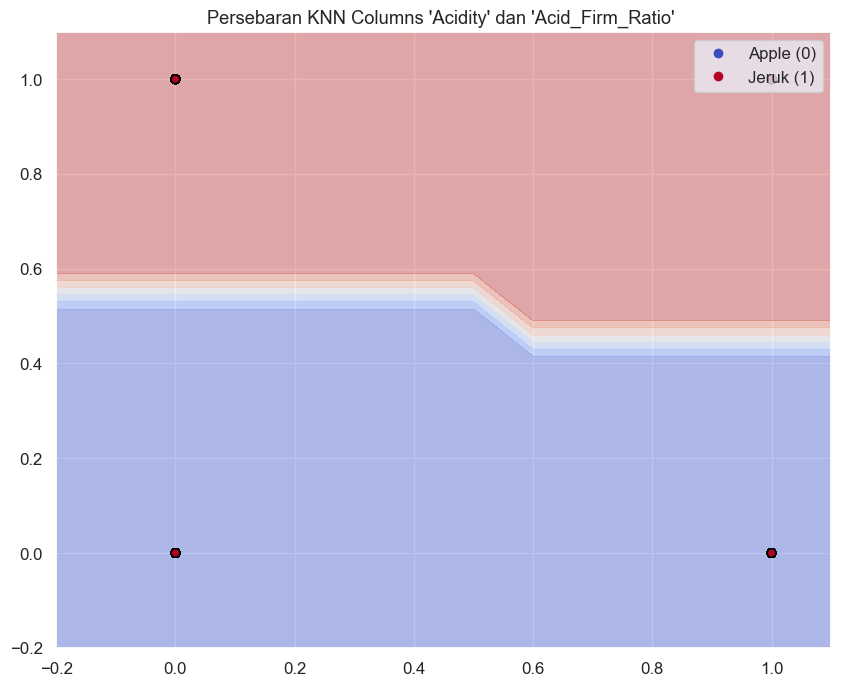

In [38]:
# mengambil column
x_mini = X_train.values[:, [0, 4]]
y_mini = y_train.values

# latih ulang model KNN Khusus Visualisasi
model_vis = KNN(k=5)
model_vis.train(x_mini, y_mini)

# Bikin grid
x_min, x_max = x_mini[:, 0].min() - 0.2, x_mini[:, 0].max() + 0.2
y_min, y_max = x_mini[:, 1].min() - 0.2, x_mini[:, 1].max() + 0.2

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prediksi dan beri warna pada Grid
z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# gambar 
plt.figure(figsize=(10, 8))

# beri grid warna floor warna coolwarm
plt.contourf(xx, yy, z, cmap='coolwarm', alpha=0.4)

# Gambar titik asli 
gambar = plt.scatter(x_mini[:, 0], x_mini[:, 1], c=y_mini, cmap='coolwarm', edgecolors='black')

plt.title("Persebaran KNN Columns 'Acidity' dan 'Acid_Firm_Ratio' ")
plt.legend(handles = gambar.legend_elements()[0], labels = ['Apple (0)', 'Jeruk (1)' ], loc = "upper right")
plt.show()